In [1]:
import paulssonlab.deaton.trenchripper.trenchripper as tr

import warnings

warnings.filterwarnings(action="once")

import matplotlib

matplotlib.rcParams["figure.figsize"] = [20, 10]

In [2]:
headpath = "/n/scratch2/de64/2019-05-31_validation_data/"
nd2file = "/n/scratch2/de64/2019-05-31_validation_data/Main_Experiment.nd2"

## Lineage Tracing

### Test Parameters

In [3]:
score_function = tr.tracking.scorefn(
    headpath,
    "fluorsegmentation",
    u_size=0.22,
    sig_size=0.08,
    u_pos=0.21,
    sig_pos=0.1,
    w_pos=1.,
    w_size=1.,
    w_merge=0.8,
)

In [4]:
score_function.interactive_scorefn()

/home/de64/miniconda3/envs/trenchripper/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


interactive(children=(IntSlider(value=0, description='trenchid', max=666), IntRangeSlider(value=(0, 70), conti…

In [6]:
Tracking_Solver = tr.tracking.tracking_solver(
    headpath,
    "fluorsegmentation",
    ScoreFn=score_function,
    edge_limit=2,
)
data, orientation, empty_trenches = score_function.output.result

In [7]:
Tracking_Solver.interactive_tracking(data, orientation)

interactive(children=(SelectMultiple(description='intensity_channel_list', options=('Phase', 'GFP'), value=())…

In [ ]:
Tracking_Solver.save_params()

### Generate Lineage Traces

In [12]:
dask_controller = tr.dask_controller(
    walltime="01:00:00",
    local=False,
    n_workers=20,
    memory="8GB",
    working_directory=headpath + "/dask",
)
dask_controller.startdask()

In [13]:
dask_controller.displaydashboard()

In [14]:
Tracking_Solver = tr.tracking.tracking_solver(
    headpath, "fluorsegmentation", paramfile=True
)

/home/de64/paulssonlab/paulssonlab/src/paulssonlab/deaton/trenchripper/trenchripper/utils.py:92: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.metadata = store.get_storer(key).attrs.metadata


In [15]:
Tracking_Solver.compute_all_lineages(dask_controller)

In [16]:
dask_controller.shutdown()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
concurrent.futures._base.CancelledError


In [8]:
cmapcolors.

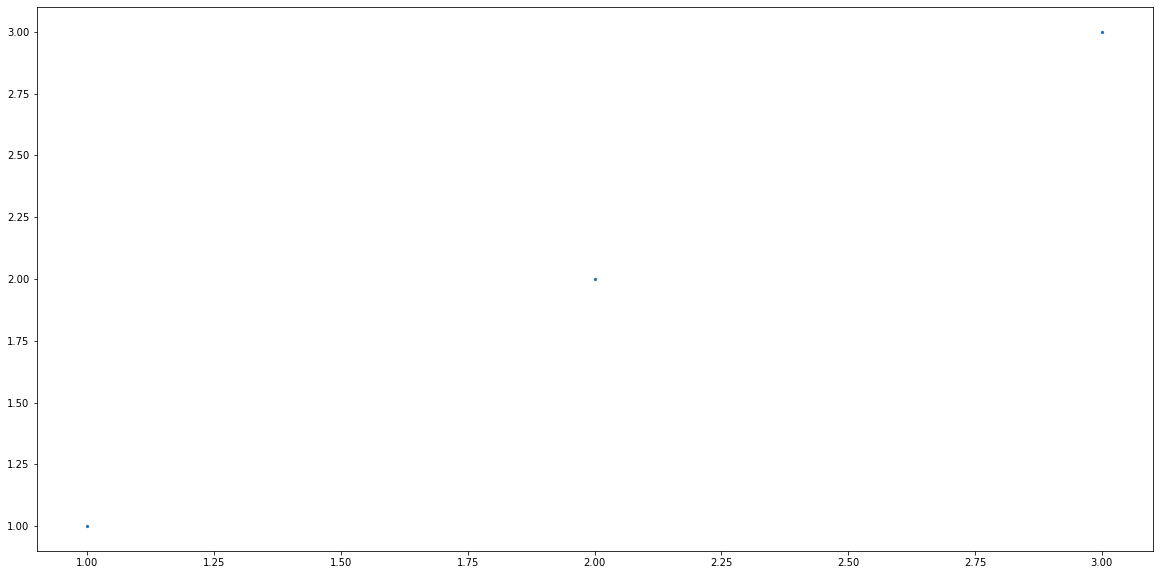

In [34]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import matplotlib

plt.scatter([1,2,3],[1,2,3],s=5)